In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.io as sio

# 1)

## a)

$\sum_i^k u_i\sigma_iv_i^t$

## b)

$\sigma_iv_i^t$

## c)
SVD of $X^t = V\Sigma^tU^t$

SVD of $XX^T = U\Sigma V^tV\Sigma^tU^t = U\Sigma \Sigma^tU^t = U\Sigma^2U^t$

SVD of $X^tX = V\Sigma^tU^tU\Sigma V^t = V\Sigma^t\Sigma V^t = V\Sigma^2V^t$ 

## d)

### i) 
![alt text](d_i.jpg)

### ii) 
![alt text](d_ii.jpg)

### iii) 
![alt text](d_iii.jpg)

In [2]:
v = np.array([[1, 3], [2, 3]])

In [3]:
v

array([[1, 3],
       [2, 3]])

In [4]:
v.T

array([[1, 2],
       [3, 3]])

In [5]:
v.T@np.array([1, 2])

array([5, 9])

# 2.

## a)

Average L2 error (train) 0.3437456313614025
Average L2 error (test) 0.6191397269106701


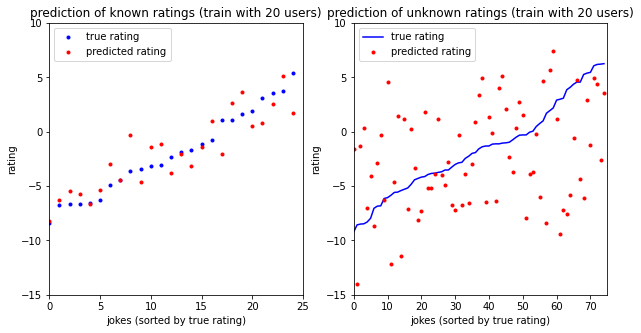

In [6]:
d_jest = sio.loadmat("jesterdata.mat")
X = d_jest['X']

d_new = sio.loadmat('newuser.mat')
y = d_new['y']
true_y = d_new['truey']

m, n = X.shape

train_indices = np.squeeze(y != - 99)
num_train = np.count_nonzero(train_indices)

test_indices = np.logical_not(train_indices)
num_test = m - num_train

X_data = X[train_indices, 0:20]
y_data = y[train_indices]
X_test = X[test_indices, 0:20]
y_test = true_y[test_indices]

w = la.inv(X_data.T@X_data)@X_data.T@y_data

y_hat_train = X_data@w

avgerr_train = la.norm(y_data - y_hat_train)/len(y_data)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,5))
sorted_indices = np.argsort(np.squeeze(y_data))
ax1.plot(range(num_train), y_data[sorted_indices], 'b.',\
         range(num_train), y_hat_train[sorted_indices], 'r.')

ax1.set_title('prediction of known ratings (train with 20 users)')
ax1.set_xlabel('jokes (sorted by true rating)')
ax1.set_ylabel('rating')
ax1.legend(['true rating', 'predicted rating'], loc='upper left')
ax1.axis([0, num_train, -15, 10])
print("Average L2 error (train)", avgerr_train)

y_hat_test = X_test@w
avgerr_test = la.norm(y_test - y_hat_test)/len(y_test)

sorted_indices = np.argsort(np.squeeze(y_test))
ax2.plot(range(num_test), y_test[sorted_indices], \
         'b', range(num_test), y_hat_test[sorted_indices], 'r.')
ax2.set_title('prediction of unknown ratings (train with 20 users)')
ax2.set_xlabel('jokes (sorted by true rating)')
ax2.set_ylabel('rating')
ax2.legend(['true rating', 'predicted rating'], loc='upper left')
ax2.axis([0, num_test, -15, 10])
print("Average L2 error (test)", avgerr_test)

While the L2 error doesn't seem too bad, her favorite joke wasn't predicted to be her favorite but the score isn't too far off so overall the predictor is not bad.


## b)

Average L2 error (train) 1.0745834548345155
Average L2 error (test) 0.5389847143029429


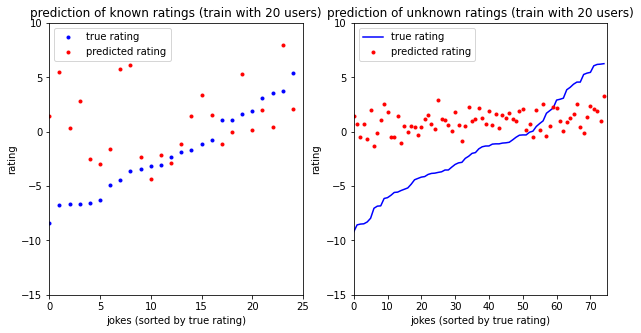

In [7]:
X_data = X[train_indices]
y_data = y[train_indices]
X_test = X[test_indices]
y_test = true_y[test_indices]

U,S,V = la.svd(X_data)

S_pi = np.zeros((n,25))

for i in range(25):
    S_pi[i][i] = 1/S[i]

w = V@S_pi@U.T@y_data

y_hat_train = X_data@w

avgerr_train = la.norm(y_data - y_hat_train)/25

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,5))
sorted_indices = np.argsort(np.squeeze(y_data))
ax1.plot(range(num_train), y_data[sorted_indices], 'b.',\
         range(num_train), y_hat_train[sorted_indices], 'r.')

ax1.set_title('prediction of known ratings (train with 20 users)')
ax1.set_xlabel('jokes (sorted by true rating)')
ax1.set_ylabel('rating')
ax1.legend(['true rating', 'predicted rating'], loc='upper left')
ax1.axis([0, num_train, -15, 10])
print("Average L2 error (train)", avgerr_train)

y_hat_test = X_test@w
avgerr_test = la.norm(y_test - y_hat_test)/len(y_test)

sorted_indices = np.argsort(np.squeeze(y_test))
ax2.plot(range(num_test), y_test[sorted_indices], \
         'b', range(num_test), y_hat_test[sorted_indices], 'r.')
ax2.set_title('prediction of unknown ratings (train with 20 users)')
ax2.set_xlabel('jokes (sorted by true rating)')
ax2.set_ylabel('rating')
ax2.legend(['true rating', 'predicted rating'], loc='upper left')
ax2.axis([0, num_test, -15, 10])
print("Average L2 error (test)", avgerr_test)

In some ways perhaps this works a little better, the L2 error is lower on the training data. The predictions are much more bunched however at least for her favorite joke I got the highest predicted value. 

## c)

One possible approach would be to search over all the columns of X and see which individual user is closest to our new user as determined by which one is the shortest distance wise from the new user (for the jokes we know)

In [8]:
norms = np.zeros(X.shape[1])
X_data = X[train_indices]
y_data = y[train_indices]
X_test = X[test_indices]
y_test = true_y[test_indices]

for i in range(X.shape[1]):
    norms[i] = la.norm(X_data[:, i] - y_data)

best_idx = np.argmin(norms)
x1_train = X_data[:, best_idx].reshape(-1,1)
x1_test = X_test[:, best_idx].reshape(-1,1)

w = la.inv(x1_train.T@x1_train)@x1_train.T@y_data
y_hat_train = x1_train@w
y_hat_test = x1_test@w
train_err_1 = la.norm(y_data - y_hat_train)/len(y_data)
test_err_1 = la.norm(y_test - y_hat_test)/len(y_test)
print("Average L2 error (train)", train_err_1)
print("Average L2 error (test)", test_err_1)

Average L2 error (train) 0.7363239972495161
Average L2 error (test) 0.5098270528110614


The approach seems to work not too badly. We can extend this to a second user by getting the second least far away.

In [9]:
second_idx = np.argmin(np.concatenate((norms[:best_idx], [np.inf], norms[best_idx + 1:]))) 
                       
x2_train = X_data[:, [best_idx, second_idx]].reshape(-1,2)
x2_test = X_test[:, [best_idx, second_idx]].reshape(-1,2)

w = la.inv(x2_train.T@x2_train)@x2_train.T@y_data
y_hat_train = x2_train@w
y_hat_test = x2_test@w
train_err_2 = la.norm(y_data - y_hat_train)/len(y_data)
test_err_2 = la.norm(y_test - y_hat_test)/len(y_test)
print("Average L2 error (train)", train_err_2)
print("Average L2 error (test)", test_err_2)

Average L2 error (train) 0.735908390944861
Average L2 error (test) 0.507933433971693


## d)

Rank of X:  100


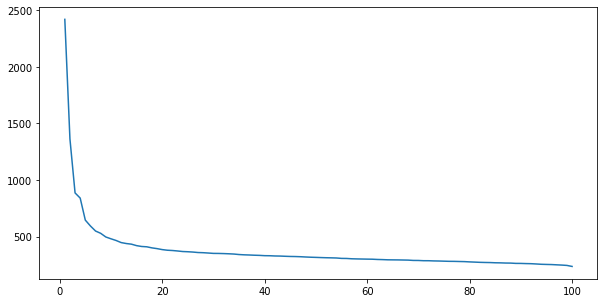

In [10]:
U, S, V = la.svd(X, full_matrices=False)
plt.figure(figsize=(10, 5))
plt.plot([i + 1 for i in range(len(S))], S)
print("Rank of X: ", la.matrix_rank(X))

While the rank of X is 100 we can see from the spectrum that there is a steep drop off in the singular values after the first few values so I think one could argue that only the first 5ish or so dimensions matter. This would tell us that there are only really 5ish representative jokes that users tend to feel the same way about.

## e)

In [11]:
from mpl_toolkits.mplot3d import axes3d

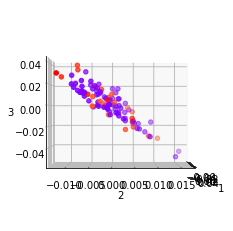

In [12]:
X_new = V[:,:3]@V[:,:3].T@X
fig = plt.figure()
ax = fig.add_subplot(projection='3d') # 3d plotting
ax.scatter(X_new[:,0],X_new[:,1], X_new[:,2], c=y, cmap="rainbow")
ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3');
elevation = 0
azimuth = 0
ax.view_init(elev=elevation, azim=azimuth)

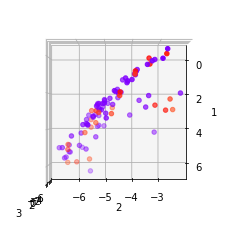

In [13]:
X_new = U[:,:3]@U[:,:3].T@X
fig = plt.figure()
ax = fig.add_subplot(projection='3d') # 3d plotting
ax.scatter(X_new[:,0],X_new[:,1], X_new[:,2], c=y, cmap="rainbow")
ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('3');
elevation = 90
azimuth = 0
ax.view_init(elev=elevation, azim=azimuth)

Looking at both the projection onto the principal components and the principal component directions we can the points are pretty well defined by two dimensions suggesting perhaps there is really only 2 kinds of jokes and 2 kinds of users.

## f)

For each round of this iteration we are multiplying a random matrix $b$ by $A$ or $XX^t$ which essentially means what we are doing is $U\Sigma V^TV\Sigma^t U^tb$ or just $U\Sigma\Sigma^t U^tb$ we do that k times so we have $U(\Sigma \Sigma^t)^kU^tb$. If we think of b as $Ug$ then we can further reduce that to $U(\Sigma \Sigma^t)^kg$. We also know that $\Sigma \Sigma^t$ is the matrix of eigenvalues for our $A$ so each round of iteration we essentially doing $U\Lambda^kg/||U\Lambda^kg||$ through all the iterations. We can also remove the largest eigenvalue to the kth power from the $\Lambda$ matrix so that its a diagonal matrix with 1 in the first position and then $(\lambda_i/\lambda_1)^k$ in each other position. Since we know $\lambda_1 > \lambda_i$ where $i > 1$ all those other values will go to 0 as k gets bigger, so we're left eventually with just the first value of $g$ and the first column of $U$ ie: $\lambda_1^kg_1U_1||\lambda_1^kg_1U_1||$ and since $\lambda_1g_1$ is just a scalar and $||U_1||$ is one we are left with $U_1$.   

In [14]:
def power_iter(A, v, iterations):
    for _ in range(iterations):
        v_new = A@v
        v_norm = la.norm(v_new)
        v = v_new / v_norm
        
    return v

In [15]:
A = X@X.T
start_vector = np.random.rand(A.shape[1])
v = power_iter(A, start_vector, 10)
print("First 5 values of power method U: ", v[:5])
print("First 5 values of SVD U: ", U[:5, 0])
eigen_value = (A@v).T@v/v.T@v
print("Power calculated First Singular Value: ", np.sqrt(eigen_value))
print("SVD First Singular Value: ", S[0])

First 5 values of power method U:  [0.08391551 0.08388239 0.08543261 0.06359329 0.06424049]
First 5 values of SVD U:  [-0.08391537 -0.08388224 -0.0854323  -0.06359266 -0.06424042]
Power calculated First Singular Value:  24200.555520983442
SVD First Singular Value:  2420.0555521085266


Its pretty close to the U, just a sign change. The 1st singular value is similar but multiplied by 10, I'm not exactly sure why or if that matters. V we can get by doing $X^tX$ instead

In [16]:
A = X.T@X
start_vector = np.random.rand(A.shape[1])
v = power_iter(A, start_vector, 10)
print("First 5 values of power method V: ", v[:5])
print("First 5 values of SVD V: ", V[:5, 0])

First 5 values of power method V:  [ 0.0098843  -0.01872329 -0.00798335  0.00063891  0.00301602]
First 5 values of SVD V:  [-0.00988451 -0.01642746  0.00230873  0.01056807  0.02494496]


It is close for the first value but seems to be generally off for most of the rest

## f) 

If we choose a starting that has a zero component in the direction of the first column of U it will not converge on the correct value. Ie say we start with the second column of U since we know thats orthogonal to the first column

In [17]:
A = X@X.T
start_vector = U[:, 1]
v = power_iter(A, start_vector, 10)
print("First 5 values of power method U: ", v[:5])
print("First 5 values of SVD U: ", U[:5, 0])
eigen_value = (A@v).T@v/v.T@v
print("Power calculated First Singular Value: ", np.sqrt(eigen_value))
print("SVD First Singular Value: ", S[0])

First 5 values of power method U:  [-0.03990794 -0.04330292 -0.0857901  -0.17839277 -0.02022125]
First 5 values of SVD U:  [-0.08391537 -0.08388224 -0.0854323  -0.06359266 -0.06424042]
Power calculated First Singular Value:  13631.564261679303
SVD First Singular Value:  2420.0555521085266


# 3)

## a)

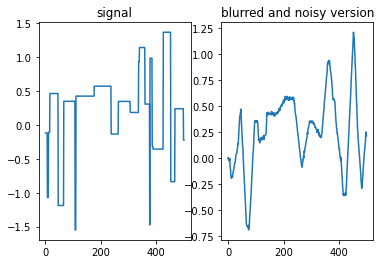

In [18]:
n = 500
k = 30
sigma = 0.01

def generate_noise(n, k, sigma, show_graph = False):
    # generate random piecewise constant signal
    w = np.zeros((n, 1))
    w[0] = np.random.standard_normal()
    for i in range(1, n):
        if np.random.rand(1) < 0.95:
            w[i] = w[i-1]
        else:
            w[i] = np.random.standard_normal()


    # generate k-point averaging function
    h = np.ones(k) / k

    # make a matrix for blurring
    m = n + k - 1
    X = np.zeros((m, m))
    for i in range(m):
        if i < k:
            X[i, :i+1] = h[:i+1]
        else:
            X[i, i - k: i] = h

    X = X[:, 0:n]

    # blurred signal + noise
    y = np.dot(X, w) + sigma*np.random.standard_normal(size=(m, 1))
    
    if show_graph:
        # plot
        f, (ax1, ax2) = plt.subplots(1, 2)
        ax1.set_title('signal')
        ax1.plot(w)
        ax2.set_title('blurred and noisy version')
        ax2.plot(y[0:n])

        plt.show()
        
    return X, w, y

X, w, y = generate_noise(n, k, sigma, True)

In [19]:
## least squares

def least_squares(X, w, y, print_msg = False):  
    w_ls = la.inv(X.T@X)@X.T@y
    err = np.mean(np.sum(w - w_ls)**2)
    if print_msg:
        print("Least Squares Mean Squared Error: ", err)
        
    return err

least_squares(X, w, y)

1.4157557061005299e-05

In [20]:
## truncated SVD

def truncated_svd(X, w, y, print_msg = False):
    U, S, V = la.svd(X)

    n, p = X.shape
    w_hats = []
    errs = np.zeros(p)
    for k in range(p):
        S_pi = np.zeros((p,n))
        for i in range(k+1):
            S_pi[i][i] = 1/S[i]

        w_hats.append(V@S_pi@U.T@y)
        errs[k] = np.mean(np.sum(w - w_hats[k])**2)

    # get best one
    best_idx = np.argmin(errs)
    w_svd = w_hats[best_idx]
    if print_msg:
        print("Best K: ", best_idx + 1)
        print("Least Squares Mean Squared Error: ", errs[best_idx])
    
    return errs[best_idx], best_idx + 1

truncated_svd(X, w, y, True)

Best K:  478
Least Squares Mean Squared Error:  13461.951393208734


(13461.951393208734, 478)

In [22]:
## Regularized Least Squares

def reg_least_squares(X, w, y, print_msg = False):
    lams = [0.5, 1, 2, 4, 8, 16, 32, 64]
    errs = np.zeros(len(lams))
    w_hats = []

    for i in range(len(lams)):
        w_hats.append(la.inv(X.T@X - lams[i]*np.identity(X.shape[1]))@X.T@y)
        errs[i] = np.mean(np.sum(w - w_hats[i])**2)


    # get best one
    best_idx = np.argmin(errs)
    w_rls = w_hats[best_idx]
    
    if print_msg:
        print("Best Lamda: ", lams[best_idx])
        print("Least Squares Mean Squared Error ", errs[best_idx])
    
    return errs[best_idx], lams[best_idx]

reg_least_squares(X, w, y, True)

Best Lamda:  64
Least Squares Mean Squared Error  17090.703766050123


(17090.703766050123, 64)

## b)

In [23]:
ks = [5, 10, 25, 50, 100, 200]
sigma = 0.01
n = 500
avg_ls_err = []
avg_ts_err = []
avg_rls_err = []
avg_ks = []
avg_lams = []
iters = 5
for k in ks:
    best_ks = np.zeros(iters)
    best_lams = np.zeros(iters)
    ls_errs = np.zeros(iters)
    ts_errs = np.zeros(iters)
    rls_errs = np.zeros(iters)
    for i in range(iters):
        X, w, y = generate_noise(n, k, sigma)
        ls_err = least_squares(X, w, y)
        ls_errs[i] = ls_err
        ts_err, best_k = truncated_svd(X, w, y)
        ts_errs[i] = ts_err
        best_ks[i] = best_k
        rls_err, best_lam = reg_least_squares(X, w, y)
        rls_errs[i] = rls_err
        best_lams[i] = best_lam
        
    avg_ls_err.append(np.mean(ls_errs))
    avg_ts_err.append(np.mean(ts_errs))
    avg_rls_err.append(np.mean(rls_errs))
    avg_ks.append(np.mean(best_ks))
    avg_lams.append(np.mean(best_lams))

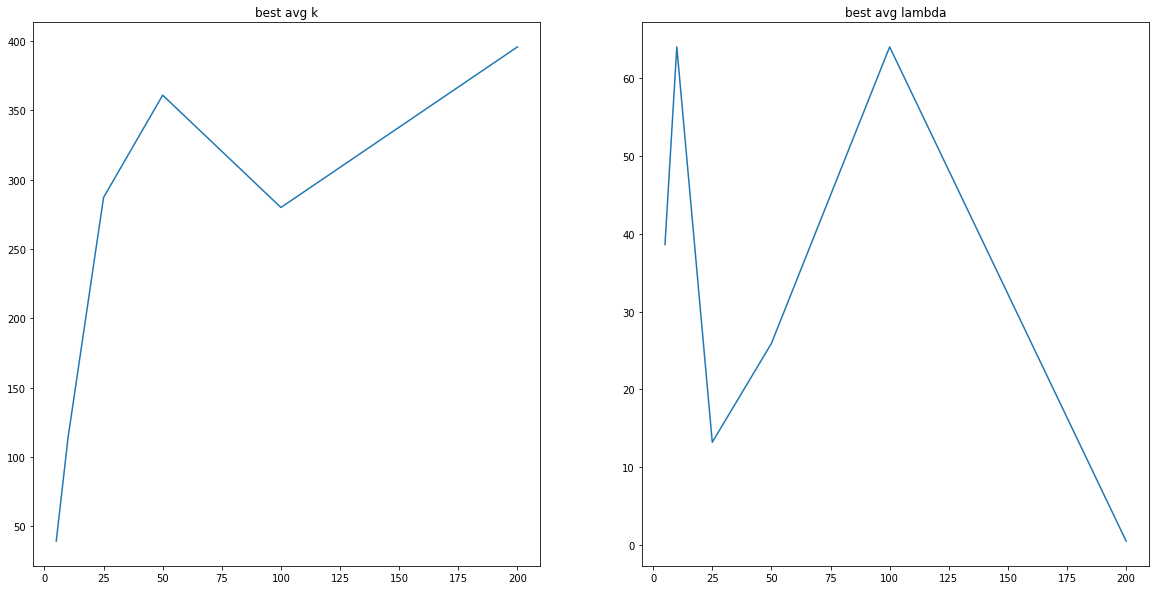

In [24]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title("best avg k")
ax1.plot(ks, avg_ks)
ax2.set_title("best avg lambda")
ax2.plot(ks, avg_lams)

In [25]:
sigmas = [0.001, 0.01, 0.05, 0.1, 0.5]
k = 30
n = 500
iters = 5

avg_ls_err = []
avg_ts_err = []
avg_rls_err = []
avg_ks = []
avg_lams = []

for sigma in sigmas:
    best_ks = np.zeros(iters)
    best_lams = np.zeros(iters)
    ls_errs = np.zeros(iters)
    ts_errs = np.zeros(iters)
    rls_errs = np.zeros(iters)
    for i in range(iters):
        X, w, y = generate_noise(n, k, sigma)
        ls_err = least_squares(X, w, y)
        ls_errs[i] = ls_err
        ts_err, best_k = truncated_svd(X, w, y)
        ts_errs[i] = ts_err
        best_ks[i] = best_k
        rls_err, best_lam = reg_least_squares(X, w, y)
        rls_errs[i] = rls_err
        best_lams[i] = best_lam
        
    avg_ls_err.append(np.mean(ls_errs))
    avg_ts_err.append(np.mean(ts_errs))
    avg_rls_err.append(np.mean(rls_errs))
    avg_ks.append(np.mean(best_ks))
    avg_lams.append(np.mean(best_lams))

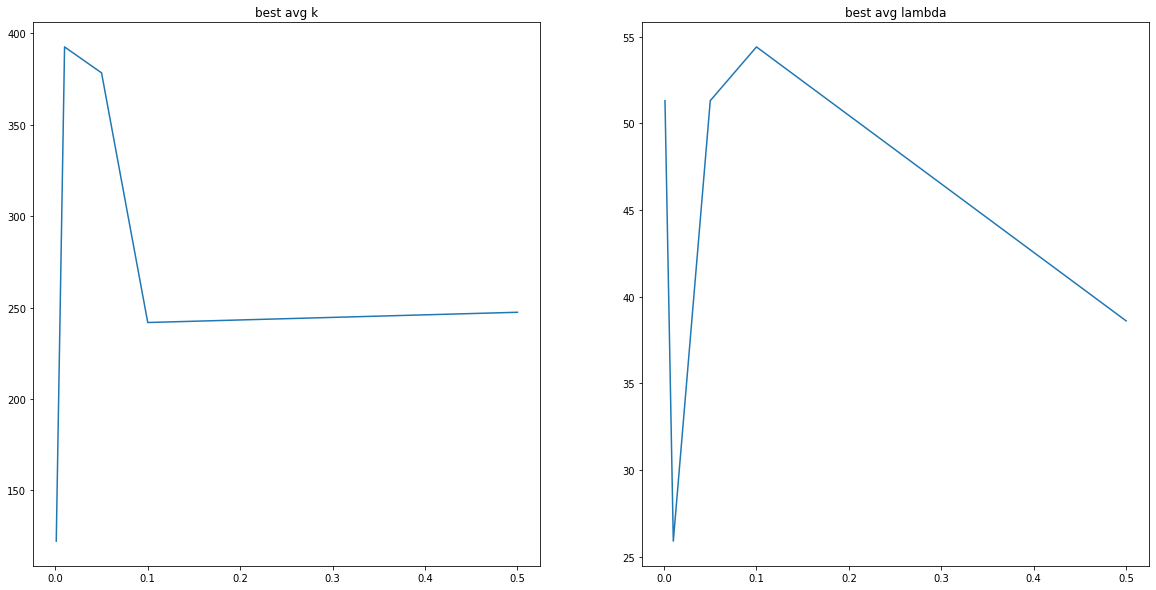

In [27]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title("best avg k")
ax1.plot(sigmas, avg_ks)
ax2.set_title("best avg lambda")
ax2.plot(sigmas, avg_lams)

It looks like as K increases the best k for truncated svd also increases. The best lambda is a little harder to parse, but it looks like at first larger and larger lambdas do better and then at a certain point smaller lambdas do better. Similarly for the sigmas at first bigger sizes of k for truncated SVD do better then it levels off (maybe around the actual useful dimensions?) and for lambdas it starts off needing bigger lambda values and then decreases as sigma increases. 